In [10]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import math
import numpy as np

train = pd.read_csv("train.csv")
train.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


# Testua aztertzen

Testua aztertzeko listak sortuko ditugu esaldiak bilduko dituena

In [2]:
text = list(train.loc[:,"text"])
target = list(train.loc[:,"target"])
      
print(text[0:4],target[0:4])
print(len(text),len(target))
print(sum(target))

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all', 'Forest fire near La Ronge Sask. Canada', "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected", '13,000 people receive #wildfires evacuation orders in California '] [1, 1, 1, 1]
7613 7613
3271


# Testua garbitzen

Hiztegiako puntuazio markak eta beste hainak karaktere kenduko dizkiogu textuari

In [3]:
def txtclean(txt):
    a=[]
    for x in text:
        p1=re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
        p1=p1.lower()
        a.append(p1)
    return a

text=txtclean(text)
text_test=text[:600]
target_test=target[:600]
text_train=text[600:]
target_train=target[600:]

# Testua lista bihurtzen

Daukagun testua hitzen lista bihurtuko dugu. Lehenengoak testua guztia bihurtuko du hitzeko lista batean, bigarrenak ordea, targetaren arabera.

In [4]:
def textlist(txt):
    lista=[]
    for text in txt:
        for hitz in text.split():
            lista.append(hitz)
    return(lista)

def textlisttar(txt,tar,t):
    lista=[]
    i=0
    for text in txt:
        if tar[i]==t:
            for hitz in text.split():
                lista.append(hitz)
        i=i+1
    return(lista)

# Hiztegiak sortzen

Hiztegiak sortu ditgu hitz bakoitzaren maiztasuna kalkulatzen. Horretarako hitz errepikapenak kontatu eta hiztegia bat osatuko dugu. 

In [5]:
def listhizt(lista):
    return {hitza:(lista.count(hitza))/len(lista) for hitza in lista}

# Histogramak sortzen

In [6]:
hizt1=listhizt(textlisttar(text_train,target_train,1))
hizt0=listhizt(textlisttar(text_train,target_train,0))
rrr=sorted(set(hizt1))
def hist(dict):
    xard=sorted(set(dict))
    yard=[dict.get(hitza) for hitza in xard]
    fig1=plt.subplot
    plt.bar(xard,yard)
    plt.xticks(rotation=90)
    return plt.show()

print(rrr)

['0', '00', '0000', '007npen6lg', '00pm', '01', '02', '02elqlopfk', '03', '033', '039', '04', '05', '05th', '06', '061', '07', '08', '0853', '087809233445', '0880', '08lngclzsj', '09', '0abgfglh7x', '0bvk5tub4j', '0c1y8g7e9p', '0cr74m1uxm', '0cxm5tkz8y', '0dqjeretxu', '0f8xa4ih1u', '0fs9ksv5xk', '0gidg9u45j', '0iw6drf5x9', '0jfnvaxfph', '0kccg1bt06', '0keh2treny', '0krw1zyahm', '0la1aw9uud', '0mnpcer9no', '0npzp', '0nr4dpjgyl', '0q040stkcv', '0r03c6njli', '0rny349unt', '0rokdutyun', '0szwlwl9qu', '0ubg9wfyge', '0uk0h9hozn', '0usdi5jcho', '0wdazlcm90', '0wdseihyqu', '0wratka2jl', '0x8jaqtowm', '0xa6fcjyec', '0xcb7yeqmw', '0xh758onup', '0xouv7dhwz', '0yaxrjicrr', '0yl3yt4ylh', '0ymf6txfch', '0yxbb5dzw5', '0z1pvjvdpf', '1', '10', '100', '1000', '10000', '1000s', '101', '103', '105', '10km', '10m', '10news', '10pm', '10th', '10\x89û', '11', '11000000', '111020', '114', '1141', '1145', '115', '115film', '119000', '11dvqjvxpo', '11juzhlgmt', '12', '12000', '120000', '1200000', '125', '129', 

# Distantziak definitzen

Esaldia bat hiztegi batetik edo bestetik gertuago dagoen jakiteko distantzi definituko dugu.

In [7]:
def dist(esal,hizt):
    d=0
    h=listhizt(textlist([esal]))
    for x in h:
        if x in hizt:
            d=d+min(h[x],hizt[x])
    return 1-d
def antz(esaldia):
    d1=dist(esaldia,hizt1)
    d0=dist(esaldia,hizt0)
    e=(d0+1e-10)/(d1+1e-10)
    return math.log(e)

def score(text):
    antze=[]
    i=0
    for x in range(len(text)):
        a=antz(text[x])
        antze.append(a)
    return antze
len(score(text_test))
len(text_test)
print(score(text_test),len(score(text_test)))

[-0.002283226402757481, 0.004019592017193931, 0.0026455931895129673, 0.010923866536480083, -0.0029702450311389584, 0.009999540157683933, 0.015357836763115876, -0.014020020082586439, 0.003748251194009428, -0.027637082947962882, -0.0018320511607198531, -0.01172593284529208, -0.014445652135716672, 0.00806971934021824, 0.00671518057404933, -0.0031764377301572726, -0.014225350753818795, -0.0021695823505358982, -0.009154101220130823, -0.0024870407386084255, -0.0030906080664611308, -0.0021356565021114137, -0.0010387221983606042, -0.0032011212413533066, 0.0, -0.007185690703498563, 0.007518637627718184, -0.00648235765429263, 0.0, -0.01125775441613967, -0.003213166626510941, 0.04332483580315528, 0.036763433540477036, 0.05500314109437141, -0.0027183523987957523, 0.040445506192174394, -0.027047446705371618, 0.05309402917186023, 0.048589420336149464, -0.008178515267353543, 0.0410738559570245, -0.016649207844350082, -0.009217511164532958, 0.0004890306174623101, 0.013485721664360734, 0.01491678831450

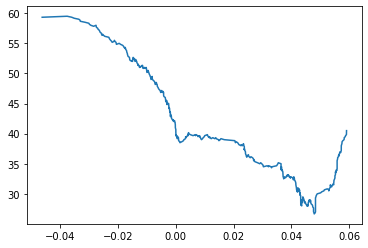

0.047923089188412184
26.666666666666668


[-0.04628803800455903,
 -0.03762224015255455,
 -0.03603693940295587,
 -0.03519434211439427,
 -0.03358075586680404,
 -0.033157159938572406,
 -0.033084307037543184,
 -0.03144410101212708,
 -0.030102213273321243,
 -0.02993184210715652,
 -0.029441015903007725,
 -0.028460808774272373,
 -0.027637082947962882,
 -0.02755553237805491,
 -0.027511068523167793,
 -0.027047446705371618,
 -0.02691890536987446,
 -0.02651271137470922,
 -0.026355777966400488,
 -0.026198904578896846,
 -0.025755522525145576,
 -0.025719522722915375,
 -0.02556266610337355,
 -0.02532698660379668,
 -0.02504406640351191,
 -0.02461135261305337,
 -0.02316865599194218,
 -0.023066283715886614,
 -0.02285032448790335,
 -0.022566386371930456,
 -0.022230270418857927,
 -0.022041371835245422,
 -0.021345719468154698,
 -0.02127529067968077,
 -0.021123220080388347,
 -0.020718978148306998,
 -0.020651822987225225,
 -0.020566250194257688,
 -0.019606641561830205,
 -0.019148600519317244,
 -0.018401583833430397,
 -0.018100368362760206,
 -0.01794

In [8]:
def errorea(score,target):
    z = sorted(zip(score,target))
    g2 = [ y for x,y in z ]
    s2 = [ x for x,y in z ]
    erro=[]
    eps=[]
    n = len(s2)
    for i,x in enumerate(s2):
        e1 = sum(g2[:i+1])
        e2 = n-i-1-sum(g2[i+1:])
        e = (e1+e2)/n * 100
        erro.append(e)
        eps.append(x)
    return(eps,erro)

eps,erro=errorea(score(text_test),target_test)        
plt.plot(eps,erro)
plt.show()
epsilon=eps[erro.index(min(erro))]
print(epsilon)
print(min(erro))
score(text_test)
eps